# Understanding the business problem: Telcom Customer Churn

1. Defination of Customer Churn:

Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Churn rate can be calculated by dividing the number of customers you lost during that time period --> say a quarter --> by the number of customers you had at the beginning of that time period.

2. It is also known as customer attrition.

Customer churn is a big problem in any industry and one of the most important concerns for the Telecom industry. It affects on the revenues of the companies, because of this Customer Churns is huge, especially in the telecom field, that's why these companies are seeking to develop a predictive potential customer churn.



The average annual churn rate of the telecom industry is between 20–40%, which leads to huge loss of revenue. Customers always have a variety of choices, and they tend to choose the companies that can offer them better quality and less expensive services. To survive in   this highly competitive market, telecom companies have to develop strategies in attracting new customers or increasing the customer retention rate. 


It is noted that acquiring a new user costs 5 to 10 times more than retaining an existing one.


Therefore, customer churn prediction has become a popular research area since it has the potential to help telecom companies to identify customers with high potential of terminating their contracts. Then, companies evaluate the situations and design appropriate service packages for these customers to retain them.


It is extremely important for the company’s long-term development.

### Aim: 

Develop a pedictive model using machine learning algorithms that can predict the situation and help the companies to design appropriate service packages for customers.

Pipeline to solve this problem:

    Step 1: Problem Definition
    Step 2: Data Collection
    Step 3: Exploratory Data Analysis (EDA)
    Step 4: Feature Engineering
    Step 5: Train/Test Split
    Step 6: Model Evaluation Metrics Definition
    Step 7: Model Selection, Training, Prediction and Assessment
    Step 8: Hyperparameter Tuning/Model Improvement

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Reading data(.csv format) from the current working directory.

In [2]:
train_ds = pd.read_csv("Telecom_churn_train.csv")
train_ds.head(10)

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   
5    AK              36        408                 No             Yes   
6    MI              65        415                 No              No   
7    ID             119        415                 No              No   
8    VA              10        408                 No              No   
9    WI              68        415                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   
5                     30              146.3              128   
6                      0              211.3              120   
7                      0              159.1              114   
8                      0              186.1              112   
9                      0              148.8               70   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   
2             56.59              317.8               97             27.01   
3             18.77              137.3              102             11.67   
4             20.28              215.1              109             18.28   
5             24.87              162.5               80             13.81   
6             35.92              162.6              122             13.82   
7             27.05              231.3              117             19.66   
8             31.64              190.2               66             16.17   
9             25.30              246.5              164             20.95   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   
2                160.6                128                7.23   
3                189.6                105                8.53   
4                178.7                 90                8.04   
5                129.3                109                5.82   
6                134.7                118                6.06   
7                143.2                 91                6.44   
8                282.8                 57               12.73   
9                129.8                103                5.84   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   
2                 5.4                 9               1.46   
3                 7.7                 6               2.08   
4                11.1                 1               3.00   
5                14.5                 6               3.92   
6                13.2                 5               3.56   
7                 8.8                 3               2.38   
8                11.4                 6               3.08   
9                12.1                 3               3.27   

   Customer service calls  Churn  
0                       1  False  
1                       4   True  
2                       4   True  
3                       2  False  
4                       1  False  
5                       0  False  
6

In [4]:
print("Checking last 5 customers information")
print("- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - ")
print(train_ds.tail(5))
print("- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - ")
print("Printing the predictor columns")
print("- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - ")
print(train_ds.columns)
print("- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - ")
print("Basic information of the dataset")
print("- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - ")
print(train_ds.info())
print("- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - ")

Checking last 5 customers information
- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - 
    State  Account length  Area code International plan Voice mail plan  \
662    WI             114        415                 No             Yes   
663    AL             106        408                 No             Yes   
664    VT              60        415                 No              No   
665    WV             159        415                 No              No   
666    CT             184        510                Yes              No   

     Number vmail messages  Total day minutes  Total day calls  \
662                     26              137.1               88   
663                     29               83.6              131   
664                      0              193.9              118   
665                      0              169.8              114   
666                      0              213.8              105   

     Total day charge  Total eve minutes  To

Observations:
1. Total 667 customers deatails are in the dataset.
2. Total 20 features are there. 19 out of 20 are predictors and 1 is the target feature.
3. Few customers have made international calls even they don't have International Plan.


In [5]:
print("Description about the features: ")
print("----------------------------------------------------------------------------------------")
print("1.State --> 'String' --> 2-letter code of the US state of customer residence")
print("----------------------------------------------------------------------------------------")
print("2.Account length --> Num -> No. of months the customer has been with the current tel provider")
print("----------------------------------------------------------------------------------------")
print("3.Area code --> 'string' --> area_code_AAA: where AAA = 3 digit area code")
print("----------------------------------------------------------------------------------------")
print("4.International plan -->yes/no --> The customer has international plan.")
print("----------------------------------------------------------------------------------------")
print("5.Voice mail plan --> yes/no --> The customer has Voice mail plan .")
print("----------------------------------------------------------------------------------------")
print("6.Number vmail messages --> numerical --> Number of voice-mail messages ranging from 0 to 50.")
print("----------------------------------------------------------------------------------------")
print("7.Total day minutes: --> numerical --> Total Number of Minutes Spent in Morning.")
print("----------------------------------------------------------------------------------------")
print("8.Total day calls: --> numerical --> Total Number of Calls made in Morning.")
print("----------------------------------------------------------------------------------------")
print("9.Total day charge: --> numerical --> Total Charge to the Customers in Morning")
print("----------------------------------------------------------------------------------------")
print("10.Total eve minutes: --> numerical --> Total Number of Minutes Spent in Evening.")
print("----------------------------------------------------------------------------------------")
print("11.Total eve calls: --> numerical --> Total Number of Calls made in Evening")
print("----------------------------------------------------------------------------------------")
print("12.Total eve charge: --> numerical --> Total Charge to the Customers in Evening")
print("----------------------------------------------------------------------------------------")
print("13.Total night minutes: --> numerical --> Total Number of Minutes Spent in Night.")
print("----------------------------------------------------------------------------------------")
print("14.Total night calls: --> numerical --> Total Number of Calls made in Night.")
print("----------------------------------------------------------------------------------------")
print("15.Total night charge: --> numerical --> Total Charge to the Customers in Night")
print("----------------------------------------------------------------------------------------")
print("16.Total Intl minutes: --> numerical --> Total Number of Minutes Spent on International call.")
print("----------------------------------------------------------------------------------------")
print("17.Total Intl calls: --> numerical --> Total Number of Calls made on International calls.")
print("----------------------------------------------------------------------------------------")
print("18.Total Intl charge: --> numerical --> Total Charge to the Customers on International calls")
print("----------------------------------------------------------------------------------------")
print("19. Customer service calls --> numerical --> Number of customer service calls made by customer.")
print("----------------------------------------------------------------------------------------")
print("20.Churn --> Boolean --> Customer Churn, True means churned customer, False means retained customer")
#print("----------------------------------------------------------------------------------------")

Description about the features: 
----------------------------------------------------------------------------------------
1.State --> 'String' --> 2-letter code of the US state of customer residence
----------------------------------------------------------------------------------------
2.Account length --> Num -> No. of months the customer has been with the current tel provider
----------------------------------------------------------------------------------------
3.Area code --> 'string' --> area_code_AAA: where AAA = 3 digit area code
----------------------------------------------------------------------------------------
4.International plan -->yes/no --> The customer has international plan.
----------------------------------------------------------------------------------------
5.Voice mail plan --> yes/no --> The customer has Voice mail plan .
----------------------------------------------------------------------------------------
6.Number vmail messages --> numerical --> Number

### Exploratory Data Analysis

There is white space in the features name. So removing the white space with "_" is needed for effective analysis.

In [6]:
##Replacing the white space with "-" in column names
train_ds.columns = train_ds.columns.str.replace(' ', '_')
train_ds.columns

Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn'],
      dtype='object')

In [7]:
# Getting the data types of all the columns

train_ds.dtypes

State                      object
Account_length              int64
Area_code                   int64
International_plan         object
Voice_mail_plan            object
Number_vmail_messages       int64
Total_day_minutes         float64
Total_day_calls             int64
Total_day_charge          float64
Total_eve_minutes         float64
Total_eve_calls             int64
Total_eve_charge          float64
Total_night_minutes       float64
Total_night_calls           int64
Total_night_charge        float64
Total_intl_minutes        float64
Total_intl_calls            int64
Total_intl_charge         float64
Customer_service_calls      int64
Churn                        bool
dtype: object

1. In this dataset, there are 3 categorical data types: "State", "International_plan" and "Voice_mail_plan".
2. 16 numerical data types
3. Target feature is "Churn" and it is of boolean data type.

In [8]:
# Getting the missing values of all the columns

print("Checking missing Value:")
train_ds.isnull().sum()

Checking missing Value:


State                     0
Account_length            0
Area_code                 0
International_plan        0
Voice_mail_plan           0
Number_vmail_messages     0
Total_day_minutes         0
Total_day_calls           0
Total_day_charge          0
Total_eve_minutes         0
Total_eve_calls           0
Total_eve_charge          0
Total_night_minutes       0
Total_night_calls         0
Total_night_charge        0
Total_intl_minutes        0
Total_intl_calls          0
Total_intl_charge         0
Customer_service_calls    0
Churn                     0
dtype: int64

There is not any missing values.

In [9]:
#Checking the statistical discription of the data and distribution of samples as well

train_ds.describe(include = "all").T

count unique    top freq        mean        std  \
State                     667     51     AZ   19         NaN        NaN   
Account_length          667.0    NaN    NaN  NaN  102.841079   40.81948   
Area_code               667.0    NaN    NaN  NaN  436.157421  41.783305   
International_plan        667      2     No  614         NaN        NaN   
Voice_mail_plan           667      2     No  478         NaN        NaN   
Number_vmail_messages   667.0    NaN    NaN  NaN    8.407796   13.99448   
Total_day_minutes       667.0    NaN    NaN  NaN  180.948126  55.508628   
Total_day_calls         667.0    NaN    NaN  NaN  100.937031   20.39679   
Total_day_charge        667.0    NaN    NaN  NaN   30.761769   9.436463   
Total_eve_minutes       667.0    NaN    NaN  NaN  203.355322  49.719268   
Total_eve_calls         667.0    NaN    NaN  NaN  100.476762  18.948262   
Total_eve_charge        667.0    NaN    NaN  NaN   17.285262    4.22616   
Total_night_minutes     667.0    NaN    NaN  NaN  199.685307  49.759931   
Total_night_calls       667.0    NaN    NaN  NaN  100.113943  20.172505   
Total_night_charge      667.0    NaN    NaN  NaN    8.985907   2.239429   
Total_intl_minutes      667.0    NaN    NaN  NaN   10.238381    2.80785   
Total_intl_calls        667.0    NaN    NaN  NaN    4.527736   2.482442   
Total_intl_charge       667.0    NaN    NaN  NaN    2.764948   0.758167   
Customer_service_calls  667.0    NaN    NaN  NaN    1.563718   1.333357   
Churn                     667      2  False  572         NaN        NaN   

                          min     25%    50%     75%    max  
State                     NaN     NaN    NaN     NaN    NaN  
Account_length            1.0    76.0  102.0   128.0  232.0  
Area_code               408.0   408.0  415.0   415.0  510.0  
International_plan        NaN     NaN    NaN     NaN    NaN  
Voice_mail_plan           NaN     NaN    NaN     NaN    NaN  
Number_vmail_messages     0.0     0.0    0.0    20.0   51.0  
Total_day_minutes        25.9  146.25  178.3   220.7  334.3  
Total_day_calls          30.0    87.5  101.0   115.0  165.0  
Total_day_charge          4.4   24.86  30.31   37.52  56.83  
Total_eve_minutes        48.1  171.05  203.7  236.45  361.8  
Total_eve_calls          37.0    88.0  101.0   113.0  168.0  
Total_eve_charge         4.09   14.54  17.31  20.095  30.75  
Total_night_minutes      23.2  167.95  201.6   231.5  367.7  
Total_night_calls        42.0    86.0  100.0   113.5  175.0  
Total_night_charge       1.04    7.56   9.07   10.42  16.55  
Total_intl_minutes        0.0     8.6   10.5   12.05   18.3  
Total_intl_calls          0.0     3.0    4.0     6.0   18.0  
Total_intl_charge         0.0    2.32   2.84   3.255   4.94  
Customer_service_calls    0.0     1.0    1.0     2.0    8.0  
Churn                     NaN     NaN    NaN     NaN    NaN

In [10]:
#Getting duplicate values in dataset

train_ds.duplicated().sum()

0

No any duplicate values in the dataset

In [11]:
#Getting unique values in dataset

train_ds.nunique()

State                      51
Account_length            179
Area_code                   3
International_plan          2
Voice_mail_plan             2
Number_vmail_messages      37
Total_day_minutes         562
Total_day_calls           100
Total_day_charge          562
Total_eve_minutes         557
Total_eve_calls            94
Total_eve_charge          528
Total_night_minutes       568
Total_night_calls          96
Total_night_charge        453
Total_intl_minutes        132
Total_intl_calls           17
Total_intl_charge         132
Customer_service_calls      9
Churn                       2
dtype: int64

In [12]:
attFeatures = []
for i in train_ds.columns:
    attFeatures.append([i, train_ds[i].nunique(), train_ds[i].drop_duplicates().values])
pd.DataFrame(attFeatures, columns = ['Features', 'Unique Number', 'Values'])

Features  Unique Number  \
0                    State             51   
1           Account_length            179   
2                Area_code              3   
3       International_plan              2   
4          Voice_mail_plan              2   
5    Number_vmail_messages             37   
6        Total_day_minutes            562   
7          Total_day_calls            100   
8         Total_day_charge            562   
9        Total_eve_minutes            557   
10         Total_eve_calls             94   
11        Total_eve_charge            528   
12     Total_night_minutes            568   
13       Total_night_calls             96   
14      Total_night_charge            453   
15      Total_intl_minutes            132   
16        Total_intl_calls             17   
17       Total_intl_charge            132   
18  Customer_service_calls              9   
19                   Churn              2   

                                               Values  
0   [LA, IN, NY, SC, HI, AK, MI, ID, VA, WI, MN, V...  
1   [117, 65, 161, 111, 49, 36, 119, 10, 68, 74, 8...  
2                                     [408, 415, 510]  
3                                           [No, Yes]  
4                                           [No, Yes]  
5   [0, 30, 33, 29, 32, 27, 22, 23, 41, 48, 24, 34...  
6   [184.5, 129.1, 332.9, 110.4, 119.3, 146.3, 211...  
7   [97, 137, 67, 103, 117, 128, 120, 114, 112, 70...  
8   [31.37, 21.95, 56.59, 18.77, 20.28, 24.87, 35....  
9   [351.6, 228.5, 317.8, 137.3, 215.1, 162.5, 162...  
10  [80, 83, 97, 102, 109, 122, 117, 66, 164, 96, ...  
11  [29.89, 19.42, 27.01, 11.67, 18.28, 13.81, 13....  
12  [215.8, 208.8, 160.6, 189.6, 178.7, 129.3, 134...  
13  [90, 111, 128, 105, 109, 118, 91, 57, 103, 92,...  
14  [9.71, 9.4, 7.23, 8.53, 8.04, 5.82, 6.06, 6.44...  
15  [8.7, 12.7, 5.4, 7.7, 11.1, 14.5, 13.2, 8.8, 1...  
16  [4, 6, 9, 1, 5, 3, 7, 2, 8, 10, 12, 11, 15, 13...  
17  [2.35, 3.43, 1.46, 2.08, 3.0, 3.92, 3.56, 2.38...  
18                        [1, 4, 2, 0, 3, 5, 6, 8, 7]  
19                                      [False, True]

In [13]:
#Analysing Target Feature

train_ds["Churn"].value_counts()

False    572
True      95
Name: Churn, dtype: int64

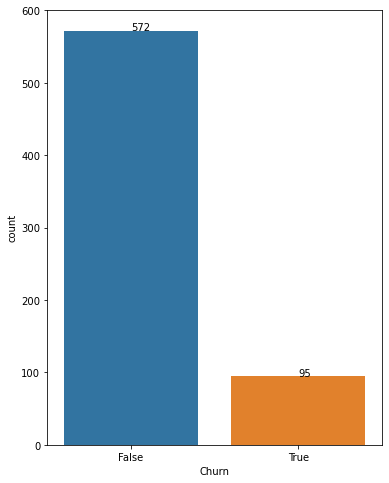

In [18]:
plt.figure(figsize=(6,8))

sns.countplot(data=train_ds, x = "Churn")

for x,y in zip(train_ds['Churn'],train_ds["Churn"].value_counts()):
    plt.text(x,y,y)

plt.show()

It is imbalanance dataset. 85.75% customers are loyal to the companies and 14.25% are churned observations.

In [20]:
#Analysing "State" Feature

print(train_ds["State"].unique())

print("- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - ")

print(train_ds["State"].value_counts())

print("- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - ")

print("No of unique states are :",train_ds["State"].nunique())

print("- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - ")

['LA' 'IN' 'NY' 'SC' 'HI' 'AK' 'MI' 'ID' 'VA' 'WI' 'MN' 'VT' 'MT' 'MA'
 'KY' 'CO' 'AZ' 'CA' 'WA' 'NE' 'OH' 'MO' 'AL' 'NH' 'NM' 'OR' 'TX' 'MS'
 'WY' 'FL' 'KS' 'NC' 'SD' 'OK' 'CT' 'RI' 'DE' 'UT' 'NV' 'DC' 'ME' 'IL'
 'NJ' 'MD' 'WV' 'PA' 'ND' 'AR' 'TN' 'IA' 'GA']
- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - 
AZ    19
ND    18
WV    18
NJ    18
KS    18
NM    18
WA    18
RI    17
ID    17
MS    17
WI    17
TX    17
IN    17
LA    16
NE    16
OR    16
KY    16
VT    16
NY    15
MI    15
MT    15
CT    15
AL    14
MN    14
MA    13
IL    13
ME    13
NH    13
TN    12
UT    12
NC    12
MO    12
OH    12
SD    11
WY    11
SC    11
CA    10
DE    10
VA    10
MD    10
FL     9
AK     9
DC     9
HI     9
PA     9
OK     9
AR     8
CO     7
IA     6
NV     5
GA     5
Name: State, dtype: int64
- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - 
No of unique states are : 51
- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - 


These customer details belongs to the 51 states.

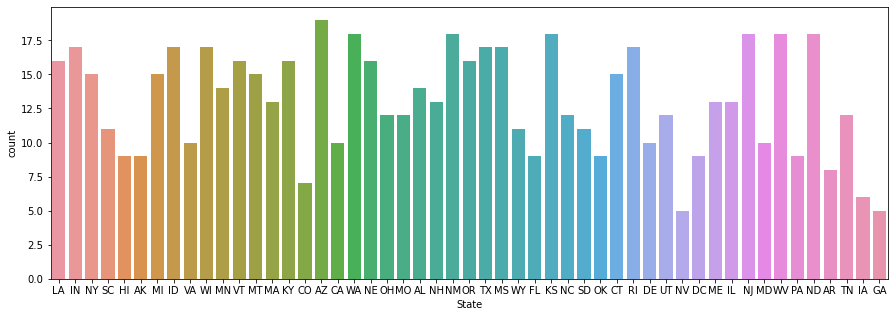

In [23]:
#Visualizing state-wise Churned and Un-churned data

plt.figure(figsize=(15,5))
sns.countplot(data = train_ds, x = "State")
plt.show()

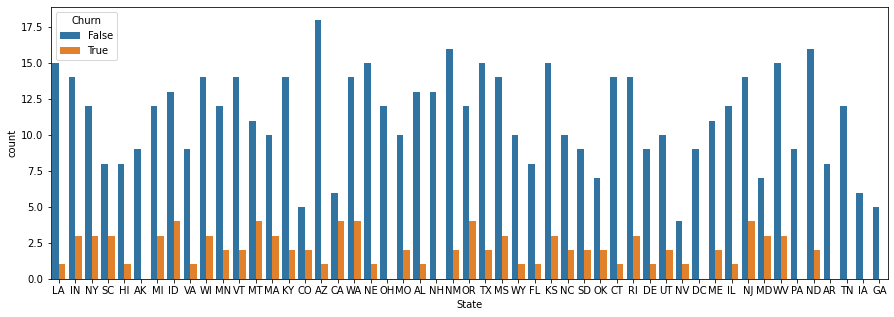

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(data = train_ds, x = "State",hue = "Churn")
plt.show()

Churn  False  True    %_churn
State                        
CA         6     4  40.000000
MD         7     3  30.000000
CO         5     2  28.571429
SC         8     3  27.272727
MT        11     4  26.666667
OR        12     4  25.000000
ID        13     4  23.529412
MA        10     3  23.076923
OK         7     2  22.222222
NJ        14     4  22.222222


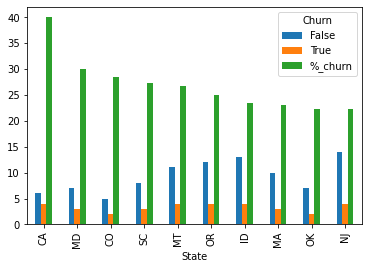

In [28]:
# Getting detailed analysis of state wise churned data with crosstab feature of pandas


churnVsState = pd.crosstab(index = train_ds["State"],columns=train_ds["Churn"])
churnVsState["%_churn"] = churnVsState[1]*100/(churnVsState[0]+churnVsState[1])
print(churnVsState.sort_values("%_churn",ascending=False).head(10))
churnVsState.sort_values("%_churn",ascending=False).head(10).plot(kind="bar")
plt.show()

In [31]:
#Analysing "Account_length"

print("Unique Values in 'Account_lenght': ",train_ds["Account_length"].nunique())

print("- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - ")

print(train_ds["Account_length"].value_counts())

print("- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - ")

Unique Values in 'Account_lenght':  179
- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - 
95     13
127    11
90     10
105    10
64      9
       ..
170     1
232     1
197     1
137     1
184     1
Name: Account_length, Length: 179, dtype: int64
- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - 


In [32]:
Account_lengthVsChurn = pd.crosstab(index = train_ds["Account_length"],columns=train_ds["Churn"])
Account_lengthVsChurn["% Churn"] = Account_lengthVsChurn[1]/(Account_lengthVsChurn[0]+Account_lengthVsChurn[1])*100
Account_lengthVsChurn

Churn           False  True  % Churn
Account_length                      
1                   2     0      0.0
3                   1     0      0.0
6                   1     0      0.0
7                   1     0      0.0
10                  1     0      0.0
...               ...   ...      ...
208                 0     1    100.0
209                 1     1     50.0
215                 1     0      0.0
217                 1     0      0.0
232                 1     0      0.0

[179 rows x 3 columns]

In [34]:
print("Unique Values in 'Area_code': ",train_ds["Area_code"].unique())

print("- - - - - - - - - - - - - -  - - - - - - - - - - - - - - - - - - - - - -")

print("Area Code    N_Values")

print("- - - - - - - - - - - - - -  - - - - - - - - - - - - - - - - - - - - - -")
print(train_ds["Area_code"].value_counts())

Unique Values in 'Area_code':  [408 415 510]
- - - - - - - - - - - - - -  - - - - - - - - - - - - - - - - - - - - - -
Area Code    N_Values
- - - - - - - - - - - - - -  - - - - - - - - - - - - - - - - - - - - - -
415    337
408    169
510    161
Name: Area_code, dtype: int64


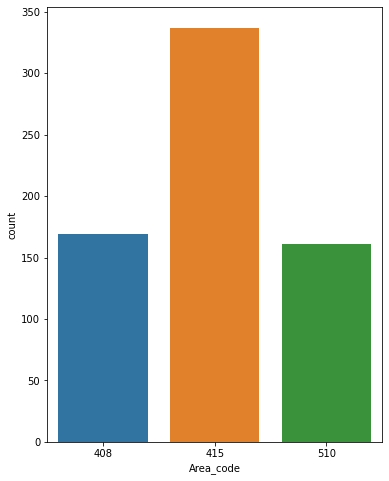

In [39]:
plt.figure(figsize=(6,8))
sns.countplot(data = train_ds, x = "Area_code")
plt.show()

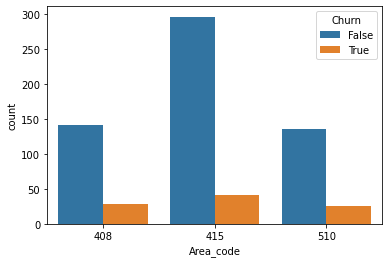

In [41]:
sns.countplot(data = train_ds, x = "Area_code", hue = "Churn")
plt.show()

In [42]:
Area_codeVsChurn = pd.crosstab(index = train_ds["Area_code"],columns=train_ds["Churn"])
Area_codeVsChurn["% Churn"] = (Area_codeVsChurn[1]/(Area_codeVsChurn[1]+Area_codeVsChurn[0]))*100
Area_codeVsChurn

Churn      False  True    % Churn
Area_code                        
408          141    28  16.568047
415          296    41  12.166172
510          135    26  16.149068

International_plan & Voice_mail_plan both are categorical data so first need to change into numerical data and then will analyse.

In [43]:
#treating categorical variable

from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()


In [44]:
train_ds["International_plan"] = labelEncoder.fit_transform(train_ds["International_plan"])

In [45]:
train_ds["International_plan"].value_counts()

0    614
1     53
Name: International_plan, dtype: int64

In [46]:
train_ds["Voice_mail_plan"] = labelEncoder.fit_transform(train_ds["Voice_mail_plan"])

In [47]:
train_ds["Voice_mail_plan"].value_counts()

0    478
1    189
Name: Voice_mail_plan, dtype: int64

In [48]:
train_ds.sample(5)

State  Account_length  Area_code  International_plan  Voice_mail_plan  \
483    RI             143        408                   0                0   
63     AL             121        408                   0                1   
430    NM              41        415                   0                0   
374    KY             125        408                   0                0   
611    ME              57        415                   0                0   

     Number_vmail_messages  Total_day_minutes  Total_day_calls  \
483                      0              167.8               72   
63                      35               68.7               95   
430                      0              232.1               74   
374                      0              191.6              115   
611                      0              221.1              101   

     Total_day_charge  Total_eve_minutes  Total_eve_calls  Total_eve_charge  \
483             28.53              211.0               99             17.94   
63              11.68              209.2               69             17.78   
430             39.46              327.1               88             27.80   
374             32.57              205.6              108             17.48   
611             37.59              236.7               65             20.12   

     Total_night_minutes  Total_night_calls  Total_night_charge  \
483                153.5                109                6.91   
63                 197.4                 42                8.88   
430                226.5                119               10.19   
374                210.2                123                9.46   
611                252.3                137               11.35   

     Total_intl_minutes  Total_intl_calls  Total_intl_charge  \
483                10.5                 6               2.84   
63                 11.4                 4               3.08   
430                10.9                 2               2.94   
374                 9.2                 3               2.48   
611                 9.5                 1               2.57   

     Customer_service_calls  Churn  
483                       4   True  
63                        1  False  
430                       3   True  
374                       2  False  
611                       0  False

In [49]:
InternationalPlanVsChurn = pd.crosstab(index = train_ds["International_plan"],columns=train_ds["Churn"])
InternationalPlanVsChurn["% Churn"] = (InternationalPlanVsChurn[1]/(InternationalPlanVsChurn[1]+InternationalPlanVsChurn[0]))*100
InternationalPlanVsChurn

Churn               False  True    % Churn
International_plan                        
0                     538    76  12.377850
1                      34    19  35.849057

Almost 90% costumers don't have International Plan

But from the dataset, I observed that costumers made international calls even though they don't have International plan.

<AxesSubplot:xlabel='International_plan'>

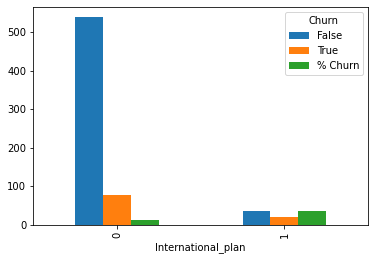

In [50]:
InternationalPlanVsChurn.plot(kind="bar")

In [51]:
voiceMailPlanVsChurn = pd.crosstab(index = train_ds["Voice_mail_plan"],columns=train_ds["Churn"])
voiceMailPlanVsChurn["% Churn"] = (voiceMailPlanVsChurn[1]/(voiceMailPlanVsChurn[1]+voiceMailPlanVsChurn[0]))*100
voiceMailPlanVsChurn

Churn            False  True    % Churn
Voice_mail_plan                        
0                  398    80  16.736402
1                  174    15   7.936508

Customers who don't subscribe to Voice Mail are more likely to Churn (16%)

71.66% customer don't have voice mail plan.

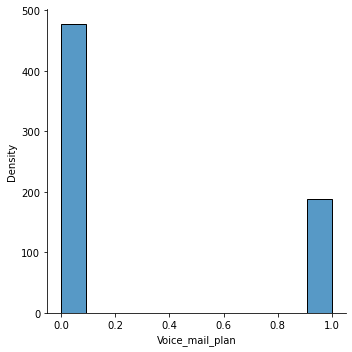

In [52]:
sns.displot(train_ds["Voice_mail_plan"])
plt.xlabel('Voice_mail_plan')
plt.ylabel('Density')
plt.show()

<AxesSubplot:xlabel='Voice_mail_plan'>

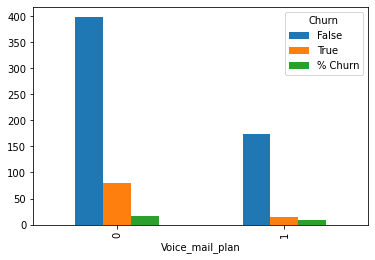

In [53]:
voiceMailPlanVsChurn.plot(kind="bar")

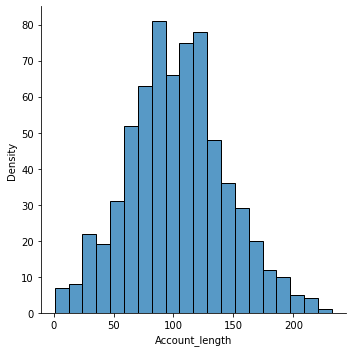

In [54]:
sns.displot(train_ds["Account_length"])
plt.xlabel('Account_length')
plt.ylabel('Density')
plt.show()

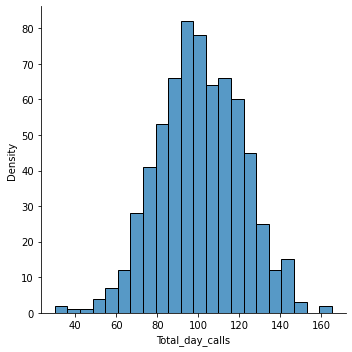

In [55]:
#Checking distribustion of "Total_day_calls"

sns.displot(train_ds["Total_day_calls"])
plt.xlabel('Total_day_calls')
plt.ylabel('Density')
plt.show()

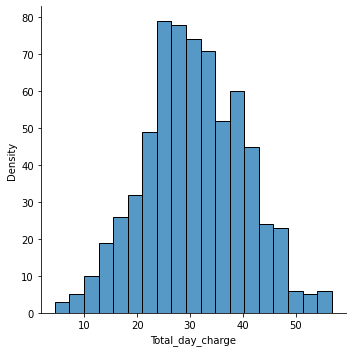

In [56]:
#Checking distribustion of "Total_day_charge"
sns.displot(train_ds["Total_day_charge"])
plt.xlabel('Total_day_charge')
plt.ylabel('Density')
plt.show()

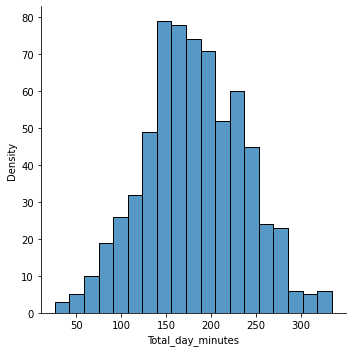

In [57]:
#Checking distribustion of "Total_day_minutes"
sns.displot(train_ds["Total_day_minutes"])
plt.xlabel('Total_day_minutes')
plt.ylabel('Density')
plt.show()

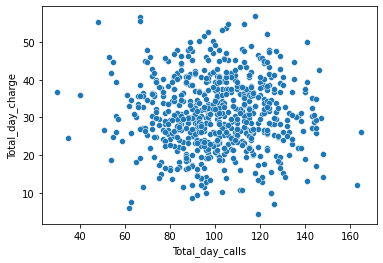

In [58]:
sns.scatterplot(data = train_ds, x = "Total_day_calls", y = "Total_day_charge" )
plt.show()

Not any meaningful relationship visible here.

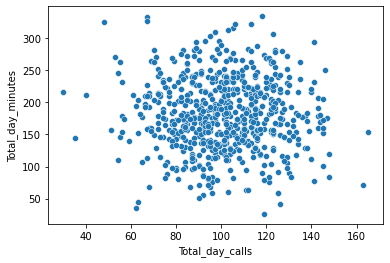

In [59]:
sns.scatterplot(data = train_ds, x = "Total_day_calls", y = "Total_day_minutes" )
plt.show()

Not any meaningful relationship visible here.

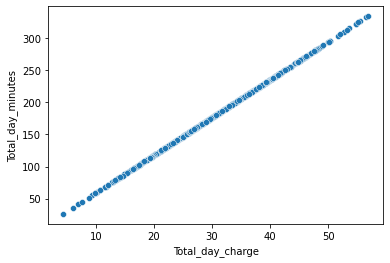

In [60]:
sns.scatterplot(data = train_ds, x = "Total_day_charge", y = "Total_day_minutes" )
plt.show()

Perfect relationship --> Highly correlated --> It can be dropped.

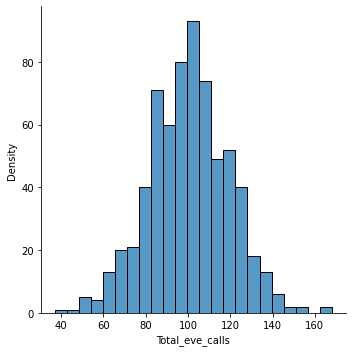

In [61]:
#Checking distribustion of "Total_eve_calls"
sns.displot(train_ds["Total_eve_calls"])
plt.xlabel('Total_eve_calls')
plt.ylabel('Density')
plt.show()

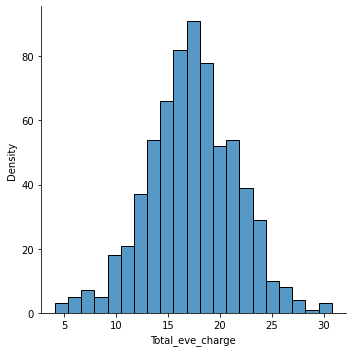

In [62]:
#Checking distribustion of "Total_eve_charge"
sns.displot(train_ds["Total_eve_charge"])
plt.xlabel('Total_eve_charge')
plt.ylabel('Density')
plt.show()

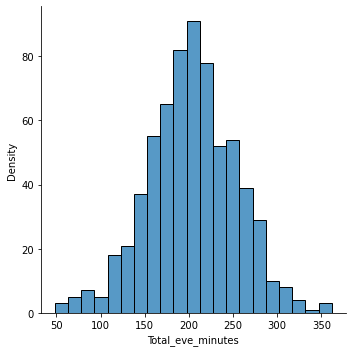

In [63]:
#Checking distribustion of "Total_eve_minutes"
sns.displot(train_ds["Total_eve_minutes"])
plt.xlabel('Total_eve_minutes')
plt.ylabel('Density')
plt.show()

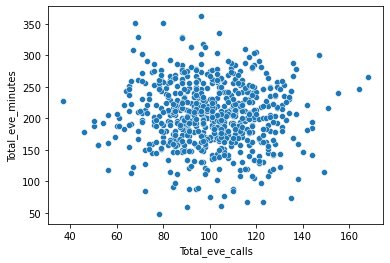

In [64]:
sns.scatterplot(data = train_ds, x = "Total_eve_calls", y = "Total_eve_minutes" )
plt.show()

Not any meaningful relationship visible here.

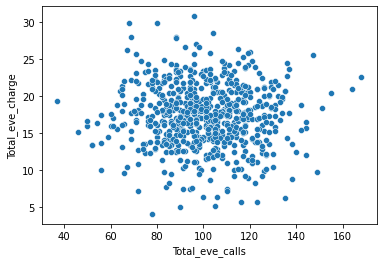

In [66]:
sns.scatterplot(data = train_ds, x = "Total_eve_calls", y = "Total_eve_charge" )
plt.show()

Not any meaningful relationship visible here.

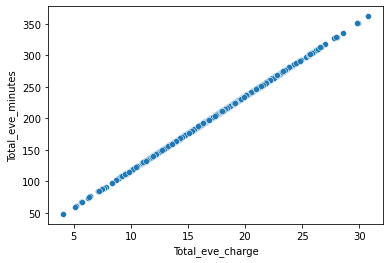

In [67]:
sns.scatterplot(data = train_ds, x = "Total_eve_charge", y = "Total_eve_minutes" )
plt.show()

Perfect relationship --> Highly correlated --> It can be dropped.

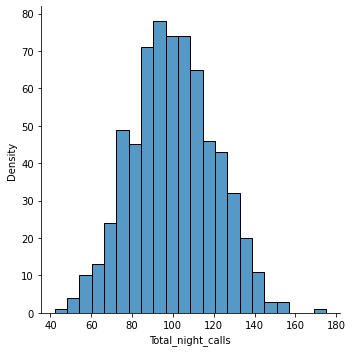

In [68]:
#Checking distribustion of "Total_night_calls"
sns.displot(train_ds["Total_night_calls"])
plt.xlabel("Total_night_calls")
plt.ylabel('Density')
plt.show()

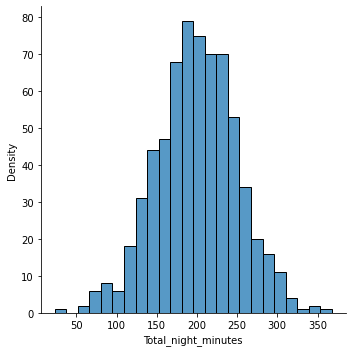

In [69]:
#Checking distribustion of "Total_night_minutes"
sns.displot(train_ds["Total_night_minutes"])
plt.xlabel("Total_night_minutes")
plt.ylabel('Density')
plt.show()

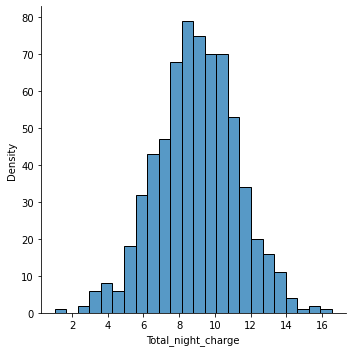

In [70]:
#Checking distribustion of "Total_night_charges"
sns.displot(train_ds["Total_night_charge"])
plt.xlabel("Total_night_charge")
plt.ylabel('Density')
plt.show()

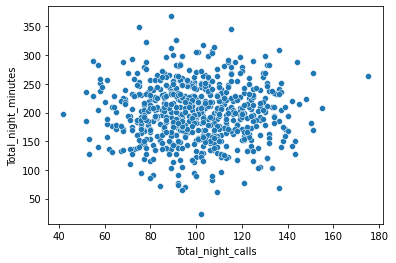

In [71]:
sns.scatterplot(data=train_ds,x="Total_night_calls",y="Total_night_minutes")
plt.show()

Not any meaningful relationship visible here.

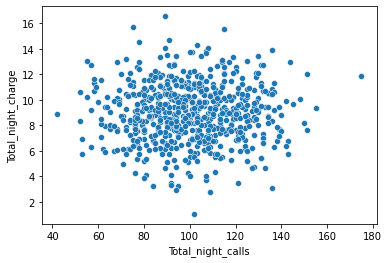

In [72]:
sns.scatterplot(data=train_ds,x="Total_night_calls",y="Total_night_charge")
plt.show()

Not any meaningful relationship visible here.

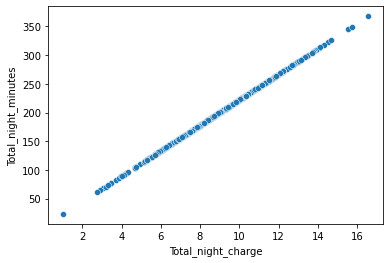

In [74]:
sns.scatterplot(data=train_ds,x="Total_night_charge",y="Total_night_minutes")
plt.show()

Perfect relationship --> Highly correlated --> It can be dropped.

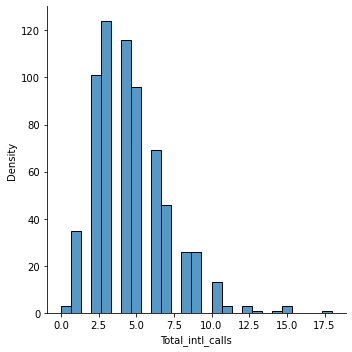

In [75]:
#Checking distribution of "Total_intl_calls"
sns.displot(train_ds["Total_intl_calls"])
plt.xlabel("Total_intl_calls")
plt.ylabel('Density')
plt.show()

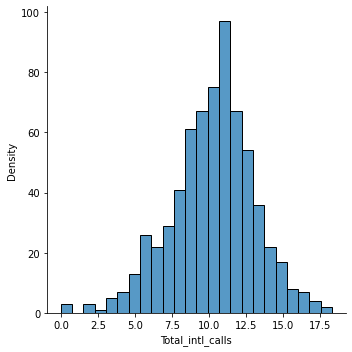

In [76]:
#Checking distribution of "Total_intl_minutes"
sns.displot(train_ds["Total_intl_minutes"])
plt.xlabel("Total_intl_calls")
plt.ylabel('Density')
plt.show()

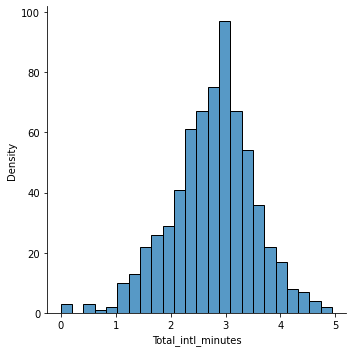

In [77]:
#Checking distribution of "Total_intl_charge"
sns.displot(train_ds["Total_intl_charge"])
plt.xlabel("Total_intl_minutes")
plt.ylabel('Density')
plt.show()

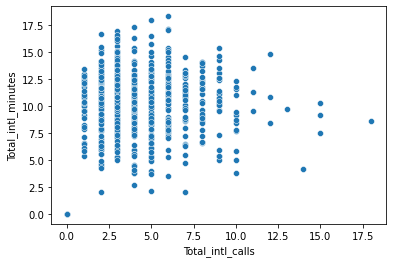

In [78]:
sns.scatterplot(data=train_ds,x="Total_intl_calls",y="Total_intl_minutes")
plt.show()

Not any meaningful relationship visible here.

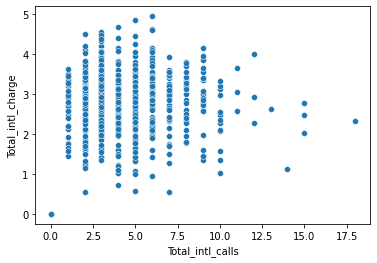

In [79]:
sns.scatterplot(data=train_ds,x="Total_intl_calls",y="Total_intl_charge")
plt.show()

Not any meaningful relationship visible here.

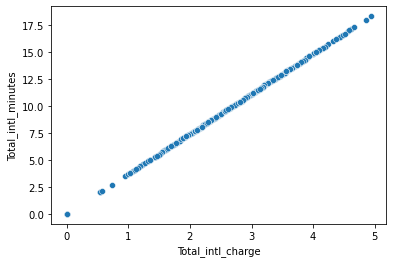

In [80]:
sns.scatterplot(data=train_ds,x="Total_intl_charge",y="Total_intl_minutes")
plt.show()

Perfect relationship --> Highly correlated --> It can be dropped.

<AxesSubplot:>

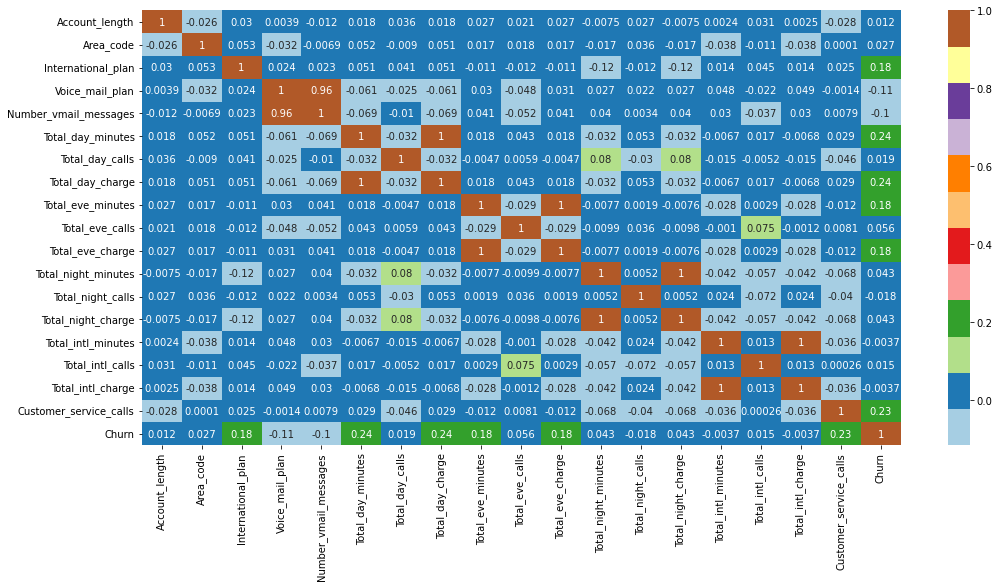

In [81]:
plt.figure(figsize = (17,8))
sns.heatmap(train_ds.corr(),cmap="Paired",annot=True)

In [82]:
#Converting the "Churn" data type into "int"
print(train_ds["Churn"].dtype)
train_ds["Churn"] = train_ds["Churn"].astype("int")
print(train_ds["Churn"].dtype)
train_ds.head()

bool
int32


State  Account_length  Area_code  International_plan  Voice_mail_plan  \
0    LA             117        408                   0                0   
1    IN              65        415                   0                0   
2    NY             161        415                   0                0   
3    SC             111        415                   0                0   
4    HI              49        510                   0                0   

   Number_vmail_messages  Total_day_minutes  Total_day_calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total_day_charge  Total_eve_minutes  Total_eve_calls  Total_eve_charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   
2             56.59              317.8               97             27.01   
3             18.77              137.3              102             11.67   
4             20.28              215.1              109             18.28   

   Total_night_minutes  Total_night_calls  Total_night_charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   
2                160.6                128                7.23   
3                189.6                105                8.53   
4                178.7                 90                8.04   

   Total_intl_minutes  Total_intl_calls  Total_intl_charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   
2                 5.4                 9               1.46   
3                 7.7                 6               2.08   
4                11.1                 1               3.00   

   Customer_service_calls  Churn  
0                       1      0  
1                       4      1  
2                       4      1  
3                       2      0  
4                       1      0

<AxesSubplot:xlabel='Customer_service_calls', ylabel='count'>

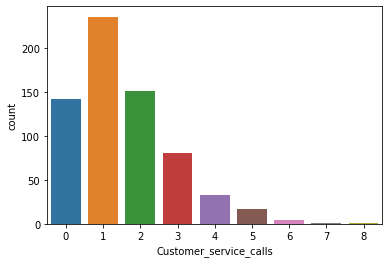

In [84]:
sns.countplot(data = train_ds, x = "Customer_service_calls")

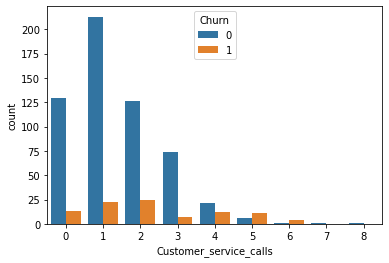

In [86]:
sns.countplot(data = train_ds, x = "Customer_service_calls",hue = "Churn")
plt.show()

There is strong corr between total call minute and total charge amount =1 and voice mail paln and number of voice message =1 should drop one of them but i am not sure of the result od drop them so i keep them and let algorithem take decision

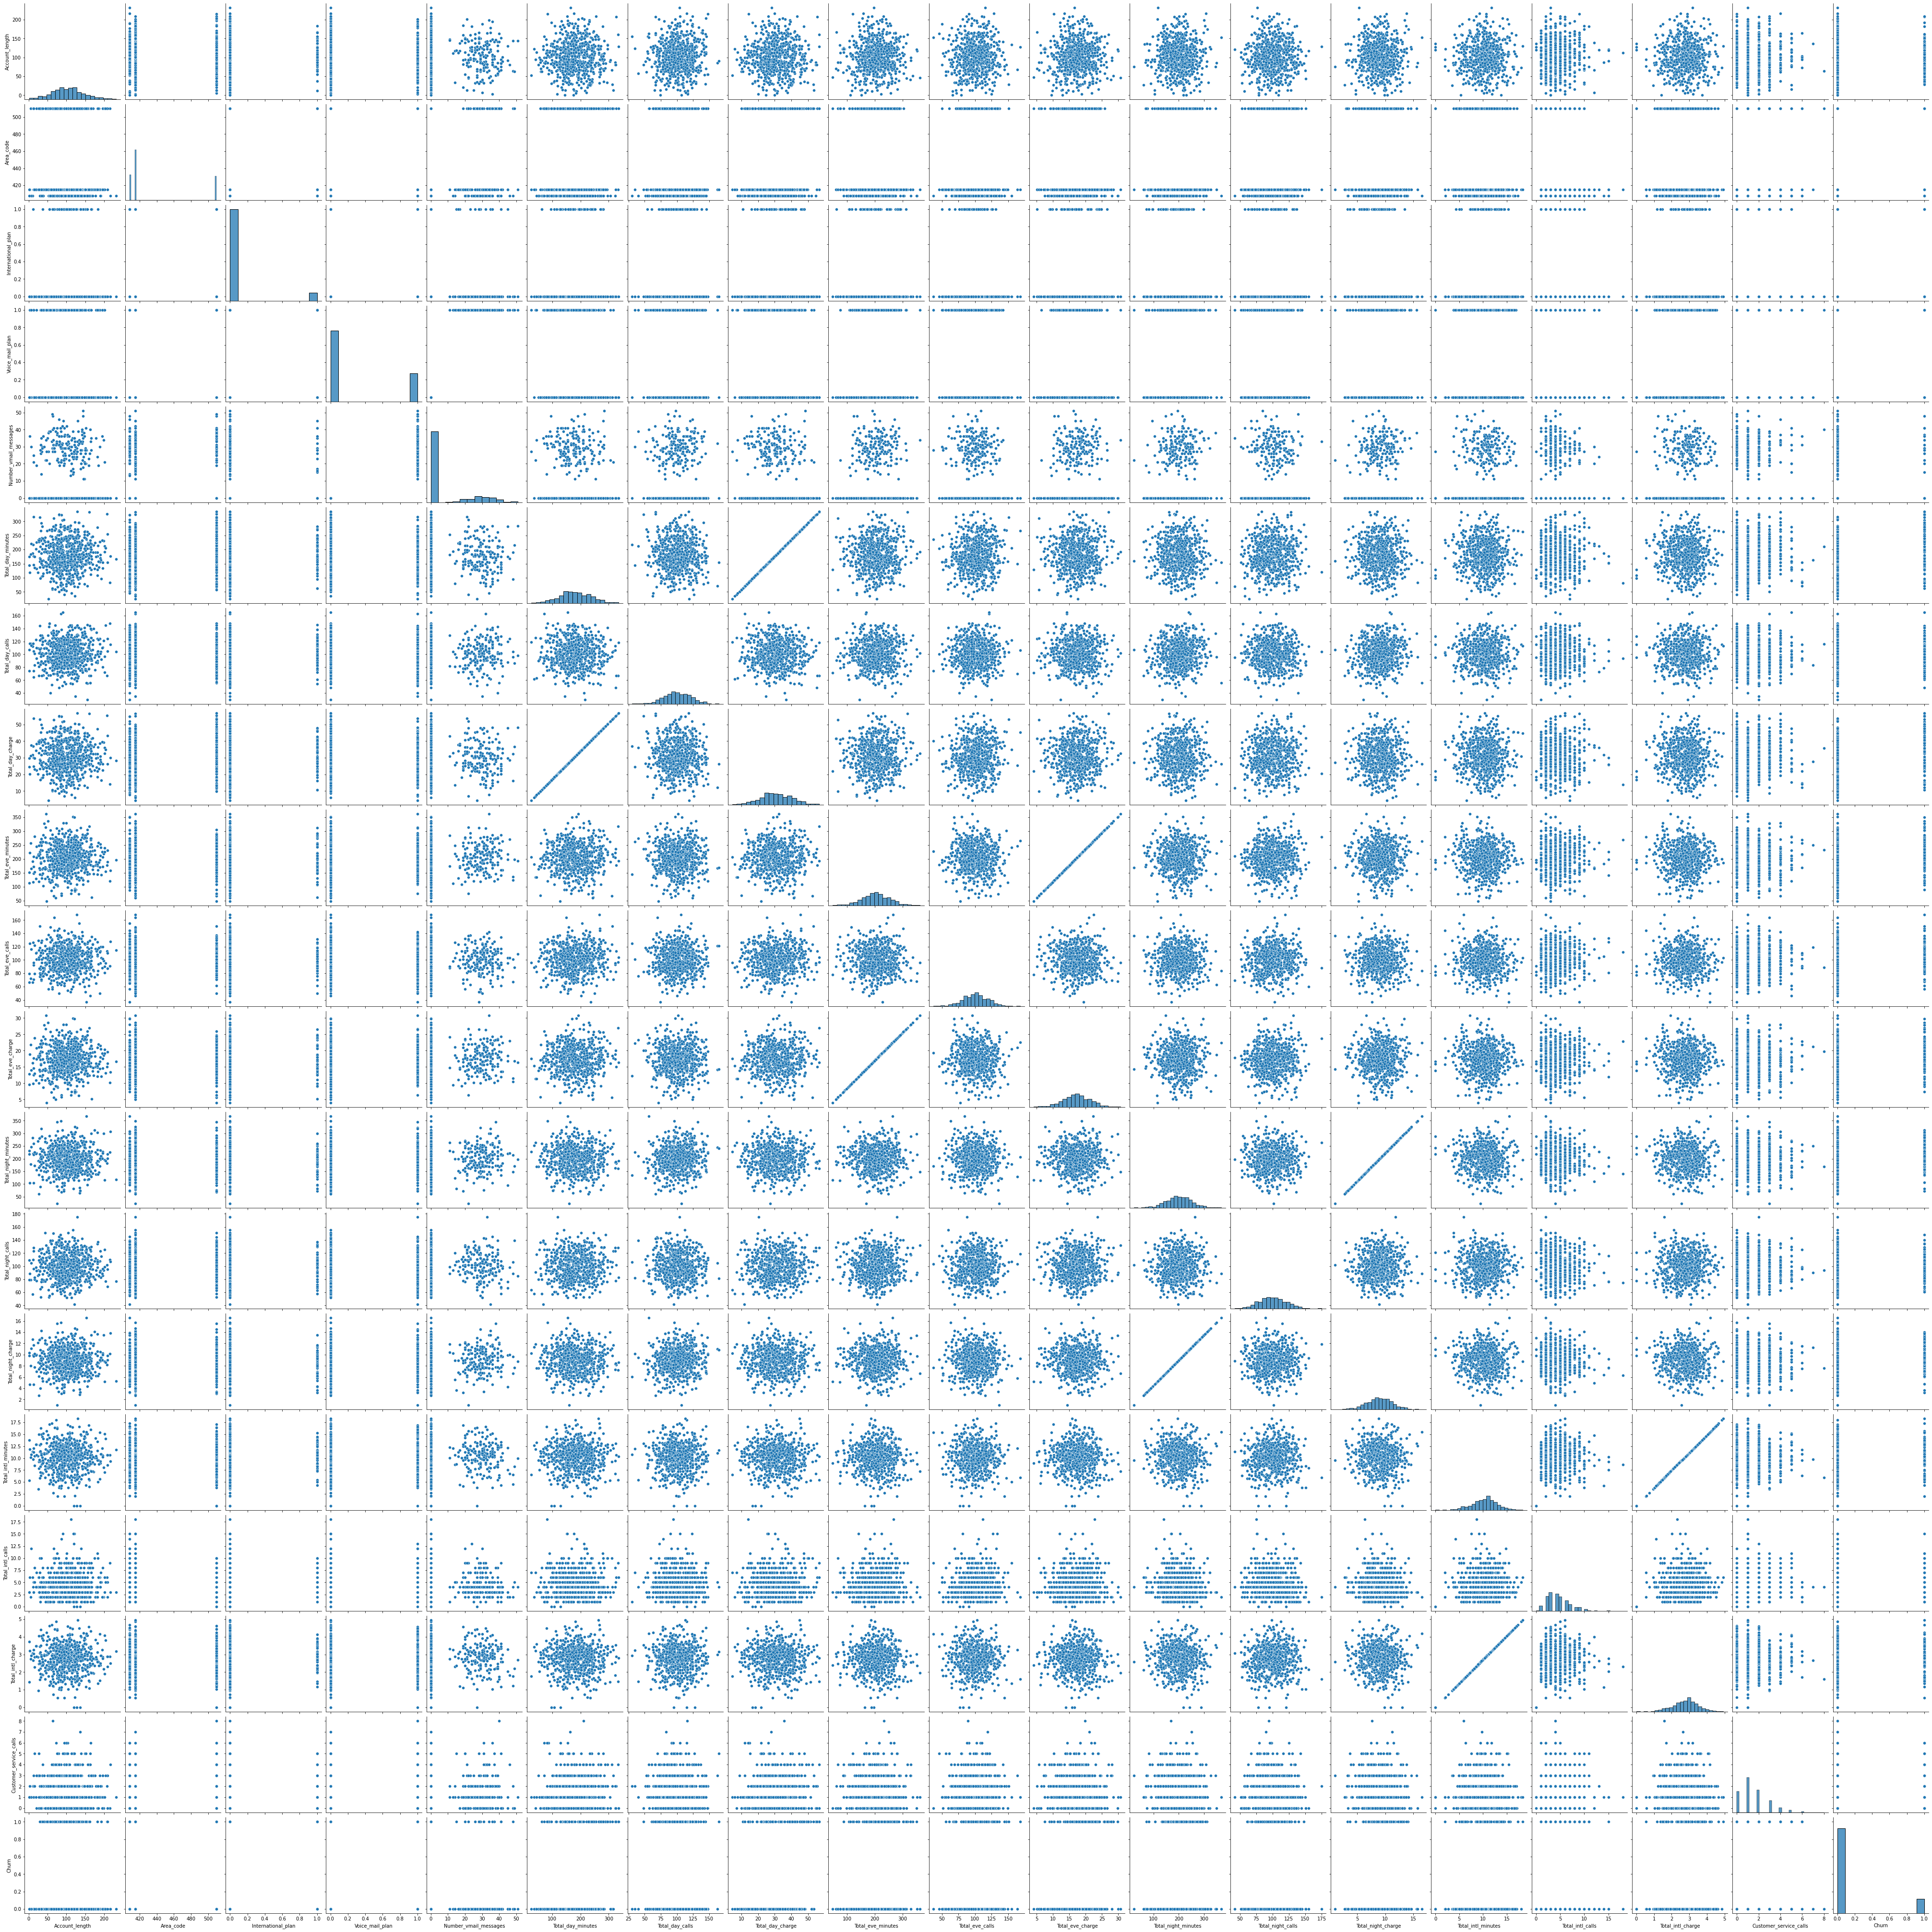

In [87]:
#Pair plot

sns.pairplot(train_ds, height=3)

### Model Prepration

In [88]:
X = train_ds.drop("Churn", axis=1)
Y = train_ds["Churn"]


In [90]:
X

State  Account_length  Area_code  International_plan  Voice_mail_plan  \
0      LA             117        408                   0                0   
1      IN              65        415                   0                0   
2      NY             161        415                   0                0   
3      SC             111        415                   0                0   
4      HI              49        510                   0                0   
..    ...             ...        ...                 ...              ...   
662    WI             114        415                   0                1   
663    AL             106        408                   0                1   
664    VT              60        415                   0                0   
665    WV             159        415                   0                0   
666    CT             184        510                   1                0   

     Number_vmail_messages  Total_day_minutes  Total_day_calls  \
0                        0              184.5               97   
1                        0              129.1              137   
2                        0              332.9               67   
3                        0              110.4              103   
4                        0              119.3              117   
..                     ...                ...              ...   
662                     26              137.1               88   
663                     29               83.6              131   
664                      0              193.9              118   
665                      0              169.8              114   
666                      0              213.8              105   

     Total_day_charge  Total_eve_minutes  Total_eve_calls  Total_eve_charge  \
0               31.37              351.6               80             29.89   
1               21.95              228.5               83             19.42   
2               56.59              317.8               97             27.01   
3               18.77              137.3              102             11.67   
4               20.28              215.1              109             18.28   
..                ...                ...              ...               ...   
662             23.31              155.7              125             13.23   
663             14.21              203.9              131             17.33   
664             32.96               85.0              110              7.23   
665             28.87              197.7              105             16.80   
666             36.35              159.6               84             13.57   

     Total_night_minutes  Total_night_calls  Total_night_charge  \
0                  215.8                 90                9.71   
1                  208.8                111                9.40   
2                  160.6                128                7.23   
3                  189.6                105                8.53   
4                  178.7                 90                8.04   
..                   ...                ...                 ...   
662                247.6                 94               11.14   
663                229.5                 73               10.33   
664                210.1                134                9.45   
665                193.7                 82                8.72   
666                139.2                137                6.26   

     Total_intl_minutes  Total_intl_calls  Total_intl_charge  \
0                   8.7                 4               2.35   
1                  12.7                 6               3.43   
2                   5.4                 9               1.46   
3                   7.7                 6               2.08   
4                  11.1                 1               3.00   
..                  ...               ...                ...   
662                11.5                 7               3.11   
663                 

In [91]:
Y


0      0
1      1
2      1
3      0
4      0
      ..
662    0
663    0
664    0
665    0
666    0
Name: Churn, Length: 667, dtype: int32

In [94]:
X = pd.get_dummies(data = X)
X

Account_length  Area_code  International_plan  Voice_mail_plan  \
0               117        408                   0                0   
1                65        415                   0                0   
2               161        415                   0                0   
3               111        415                   0                0   
4                49        510                   0                0   
..              ...        ...                 ...              ...   
662             114        415                   0                1   
663             106        408                   0                1   
664              60        415                   0                0   
665             159        415                   0                0   
666             184        510                   1                0   

     Number_vmail_messages  Total_day_minutes  Total_day_calls  \
0                        0              184.5               97   
1                        0              129.1              137   
2                        0              332.9               67   
3                        0              110.4              103   
4                        0              119.3              117   
..                     ...                ...              ...   
662                     26              137.1               88   
663                     29               83.6              131   
664                      0              193.9              118   
665                      0              169.8              114   
666                      0              213.8              105   

     Total_day_charge  Total_eve_minutes  Total_eve_calls  ...  State_SD  \
0               31.37              351.6               80  ...         0   
1               21.95              228.5               83  ...         0   
2               56.59              317.8               97  ...         0   
3               18.77              137.3              102  ...         0   
4               20.28              215.1              109  ...         0   
..                ...                ...              ...  ...       ...   
662             23.31              155.7              125  ...         0   
663             14.21              203.9              131  ...         0   
664             32.96               85.0              110  ...         0   
665             28.87              197.7              105  ...         0   
666             36.35              159.6               84  ...         0   

     State_TN  State_TX  State_UT  State_VA  State_VT  State_WA  State_WI  \
0           0         0         0         0         0         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
662         0         0         0         0         0         0         1   
663         0         0         0         0         0         0         0   
664         0         0         0         0         1         0         0   
665         0         0         0         0         0         0         0   
666         0         0         0         0         0         0         0   

     State_WV  State_WY  
0           0         0  
1           0         0  
2           0         0  
3           0         0  
4           0         0  
..        ...       ...  
662         0         0  
663         0         0  
664         0         0  
665         1         0  
666         0         0  

[667 rows x 69 columns]

In [96]:
#treating imbalance data

from imblearn.over_sampling import SMOTE

import collections

smote = SMOTE(sampling_strategy=1,random_state=1)

x_smote, y_smote = smote.fit_resample(X, Y)

print('Before upsampling count of label 0 {}'.format(sum(Y==0)))
print('Before upsampling count of label 1 {}'.format(sum(Y==1)))
print('After upsampling count of label 0 {}'.format(sum(y_smote==0)))
print('After upsampling count of label 1 {}'.format(sum(y_smote==1)))

Before upsampling count of label 0 572
Before upsampling count of label 1 95
After upsampling count of label 0 572
After upsampling count of label 1 572


In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(x_smote)


In [98]:
X_scaled

array([[ 0.39197766, -0.68430038, -0.27969284, ..., -0.12281814,
        -0.12643493, -0.09853293],
       [-1.01926528, -0.51836417, -0.27969284, ..., -0.12281814,
        -0.12643493, -0.09853293],
       [ 1.58610631, -0.51836417, -0.27969284, ..., -0.12281814,
        -0.12643493, -0.09853293],
       ...,
       [-1.31779744, -0.35242796, -0.27969284, ..., -0.12281814,
        -0.12643493, -0.09853293],
       [-1.58919032,  1.73362728, -0.27969284, ..., -0.12281814,
        -0.12643493, -0.09853293],
       [ 0.17486336, -0.68430038, -0.27969284, ..., -0.12281814,
        -0.12643493, -0.09853293]])

### Logistic Regression

In [99]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y_smote,test_size=0.25,random_state=30)

(x_train.shape),(y_train.shape),(x_test.shape),(y_test.shape)

((858, 69), (858,), (286, 69), (286,))

In [100]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [101]:
prediction_logistic = lr.predict(x_test)
prediction_logistic

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [102]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [114]:
print("Accuracy Score: ", accuracy_score(y_test,prediction_logistic))
print("Training accuracy Score: ", lr.score(x_train,y_train))

Accuracy Score:  0.9020979020979021
Training accuracy Score:  0.9382284382284383


In [104]:
#Classification Report

print("Classification Report: ")
print(classification_report(y_test,prediction_logistic))

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       144
           1       0.91      0.89      0.90       142

    accuracy                           0.90       286
   macro avg       0.90      0.90      0.90       286
weighted avg       0.90      0.90      0.90       286



In [105]:
confMatrix = confusion_matrix(y_test, prediction_logistic)
print("Confusion Matrix:")
print(confMatrix)

Confusion Matrix:
[[132  12]
 [ 16 126]]


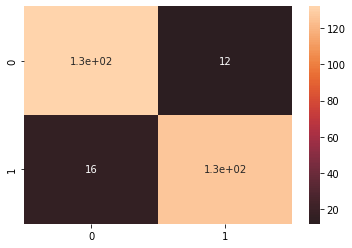

In [110]:
sns.heatmap(confMatrix, center = True, annot=True)
plt.show()

### Naive Bayes Model

In [115]:
from sklearn.naive_bayes import GaussianNB

nbm = GaussianNB()

nbm.fit(x_train,y_train)

GaussianNB()

In [116]:
prediction_NB= nbm.predict(x_test)
prediction_NB

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [117]:
print("Accuracy Score: ", accuracy_score(y_test,prediction_NB))
print("Training accuracy Score: ", nbm.score(x_train,y_train))

Accuracy Score:  0.7482517482517482
Training accuracy Score:  0.7750582750582751


In [118]:
#Classification Report

print("Classification Report: ")
print(classification_report(y_test,prediction_NB))

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       144
           1       0.70      0.87      0.78       142

    accuracy                           0.75       286
   macro avg       0.76      0.75      0.74       286
weighted avg       0.77      0.75      0.74       286



In [119]:
#Confusion Matrix
confMatrix_NB = confusion_matrix(y_test, prediction_NB)
print("Confusion Matrix:")
print(confMatrix_NB)

Confusion Matrix:
[[ 90  54]
 [ 18 124]]


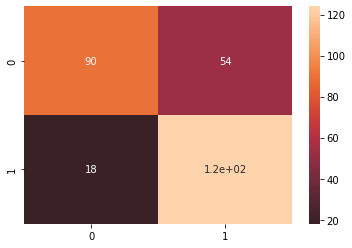

In [120]:
sns.heatmap(confMatrix_NB, center = True, annot=True)
plt.show()

### Support Vector Machine

In [121]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf",C = 1.0)

svc.fit(x_train, y_train)

SVC()

In [140]:
prediction_SVC= svc.predict(x_test)
prediction_SVC

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [123]:
print("Accuracy Score: ", accuracy_score(y_test,prediction_SVC))
print("Training accuracy Score: ", svc.score(x_train,y_train))

Accuracy Score:  0.9055944055944056
Training accuracy Score:  0.9207459207459208


In [141]:
#Classification Report

print("Classification Report: ")
print(classification_report(y_test,prediction_SVC))

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       144
           1       1.00      0.81      0.89       142

    accuracy                           0.91       286
   macro avg       0.92      0.90      0.90       286
weighted avg       0.92      0.91      0.90       286



In [142]:
#Confusion Matrix
confMatrix_SVC = confusion_matrix(y_test, prediction_SVC)
print("Confusion Matrix:")
print(confMatrix_SVC)

Confusion Matrix:
[[144   0]
 [ 27 115]]


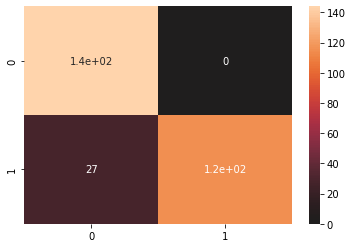

In [143]:
sns.heatmap(confMatrix_SVC, center = True, annot=True)
plt.show()

### Decision Tree Model

In [144]:
from sklearn.tree import DecisionTreeClassifier

dtm = DecisionTreeClassifier(criterion="entropy",random_state=1)

dtm.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [145]:
prediction_DT= dtm.predict(x_test)
prediction_DT

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [146]:
print("Accuracy Score: ", accuracy_score(y_test,prediction_DT))
print("Training accuracy Score: ", dtm.score(x_train,y_train))

Accuracy Score:  0.8811188811188811
Training accuracy Score:  1.0


In [147]:
#Classification Report

print("Classification Report: ")
print(classification_report(y_test,prediction_DT))

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       144
           1       0.88      0.88      0.88       142

    accuracy                           0.88       286
   macro avg       0.88      0.88      0.88       286
weighted avg       0.88      0.88      0.88       286



In [148]:
#Confusion Matrix
confMatrix_DT = confusion_matrix(y_test, prediction_DT)
print("Confusion Matrix:")
print(confMatrix_DT)

Confusion Matrix:
[[127  17]
 [ 17 125]]


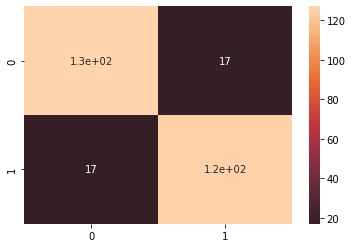

In [149]:
sns.heatmap(confMatrix_DT, center = True, annot=True)
plt.show()

### KNN

In [155]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=2)

knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [156]:
prediction_KNN= knn_model.predict(x_test)
prediction_KNN

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [159]:
print("Accuracy Score: ", accuracy_score(y_test,prediction_KNN))
print("Training accuracy Score: ", knn_model.score(x_train,y_train))

Accuracy Score:  0.8951048951048951
Training accuracy Score:  0.9242424242424242


In [160]:
#Classification Report

print("Classification Report: ")
print(classification_report(y_test,prediction_KNN))

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       144
           1       0.97      0.81      0.88       142

    accuracy                           0.90       286
   macro avg       0.91      0.89      0.89       286
weighted avg       0.91      0.90      0.89       286



In [161]:
#Confusion Matrix
confMatrix_KNN = confusion_matrix(y_test, prediction_KNN)
print("Confusion Matrix:")
print(confMatrix_KNN)

Confusion Matrix:
[[141   3]
 [ 27 115]]


<AxesSubplot:>

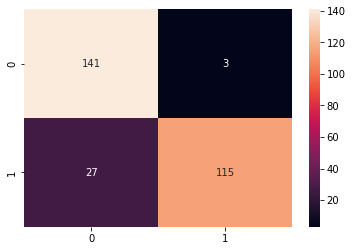

In [164]:
sns.heatmap(confMatrix_KNN,annot=True,fmt='d')

### Random Forest Tree

In [165]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)

rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=600)

In [166]:
prediction_RFT = rfc.predict(x_test)
prediction_RFT

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [167]:
print("Accuracy Score: ", accuracy_score(y_test,prediction_RFT))
print("Training accuracy Score: ", rfc.score(x_train,y_train))

Accuracy Score:  0.9615384615384616
Training accuracy Score:  1.0


In [168]:
#Classification Report

print("Classification Report: ")
print(classification_report(y_test,prediction_RFT))

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       144
           1       0.96      0.96      0.96       142

    accuracy                           0.96       286
   macro avg       0.96      0.96      0.96       286
weighted avg       0.96      0.96      0.96       286



In [169]:
#Confusion Matrix
confMatrix_RTF = confusion_matrix(y_test, prediction_RFT)
print("Confusion Matrix:")
print(confMatrix_RTF)

Confusion Matrix:
[[139   5]
 [  6 136]]


<AxesSubplot:>

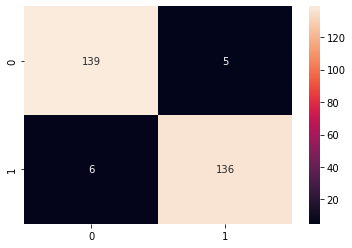

In [170]:
sns.heatmap(confMatrix_RTF,annot=True,fmt='d')

### XGBOOST

In [172]:
!pip3 install xgboost
from xgboost import XGBClassifier

Defaulting to user installation because normal site-packages is not writeable


In [173]:
XGB=XGBClassifier()

In [174]:
XGB.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [175]:
prediction_xgb = XGB.predict(x_test)
prediction_xgb

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [176]:
print("Accuracy Score: ", accuracy_score(y_test,prediction_xgb))
print("Training accuracy Score: ", XGB.score(x_train,y_train))

Accuracy Score:  0.972027972027972
Training accuracy Score:  1.0


In [177]:
#Classification Report

print("Classification Report: ")
print(classification_report(y_test,prediction_xgb))

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       144
           1       0.97      0.97      0.97       142

    accuracy                           0.97       286
   macro avg       0.97      0.97      0.97       286
weighted avg       0.97      0.97      0.97       286



In [178]:
#Confusion Matrix
confMatrix_xgb = confusion_matrix(y_test, prediction_xgb)
print("Confusion Matrix:")
print(confMatrix_xgb)

Confusion Matrix:
[[140   4]
 [  4 138]]


<AxesSubplot:>

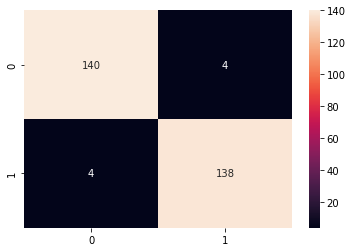

In [179]:
sns.heatmap(confMatrix_xgb,annot=True,fmt='d')